Using BEAST plotting functions and Pandas to analyze BEAST output
==========

Here we go through a demo of some of the functions available in ``beast.plotting``.

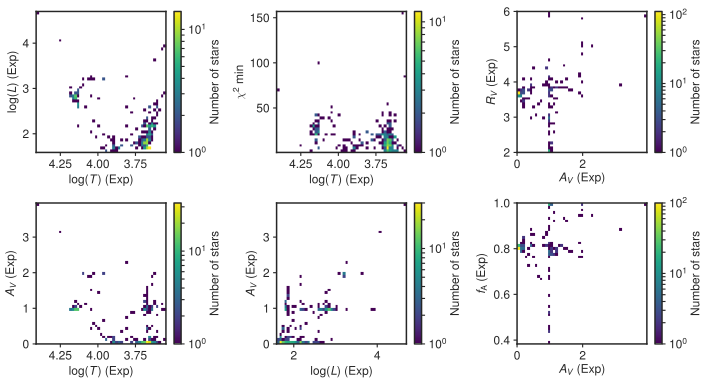

In [1]:
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

from beast.plotting.plot_stats_check import make_diagnostic_plots
from beast.plotting.beastplotlib import set_params

set_params()

results_file = 'beast_example_phat/beast_example_phat_stats.fits'
fig = make_diagnostic_plots(results_file)


We can also use the function ``plot_generic`` that is the basis for ``make_diagnostic_plots`` to make more customized plots of the output. ``plot_generic`` takes at minimum a table of BEAST output and the names of two columns to plot against each other. It defaults to a 2D histogram, as seen above, but can also make a scatterplot (configured through the ``plottype`` kwarg).

There are also optional arguments ``thresh_col``, ``thresh``, and ``thresh_op`` that together define a threshold above or below which to cut off table values so only desired values are plotted. ``thresh_col`` is the name of the column to cut values on, ``thresh`` is the value to set the cutoff to, and ``thresh_op`` must be the name of one of the NumPy [element-wise logic operators](https://docs.scipy.org/doc/numpy/reference/routines.logic.html): "greater", "greater_equal", "less",  "less_equal", "equal", or "not_equal".

Below, we make an HR diagram scatterplot with points colormapped by $\chi^2$ fit, and then add circles around the points with $\chi^2 > 50$.

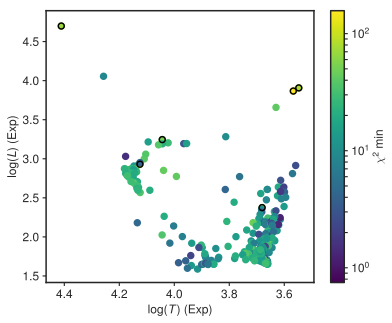

In [2]:
from beast.plotting.beastplotlib import plot_generic

from astropy.table import Table
from matplotlib.colors import LogNorm

# read in FITS table; this happens under the hood in make_diagnostic_plots
t = Table.read(results_file)
# make scatterplot of all values with a log-scale colormap of chi^2 values
fig, ax, cbar = plot_generic(t, 'logT_Exp', 'logL_Exp', plottype='scatter', 
                             plot_kwargs={'c'    : t['chi2min'],
                                          'norm' : LogNorm() })
fig.set_size_inches(6,5)

# add transparent circles for points with chi^2 values above 50
plot_generic(t, 'logT_Exp', 'logL_Exp', plottype='scatter', fig=fig, ax=ax, 
             thresh_col='chi2min', thresh=50, thresh_op='greater', 
             plot_kwargs={'facecolor' : 'none',
                          'edgecolor' : 'k' })

Another very useful diagnostic tool is ``scatter_matrix`` from the Pandas plotting library. This function, given a Pandas dataframe object, plots each column against each other, with a histogram or kernel density estimate for the diagonal. Here we use it to plot all estimates of luminosity (expectation value, best value, and 16th, 50th, and 84th percentiles) against each other.

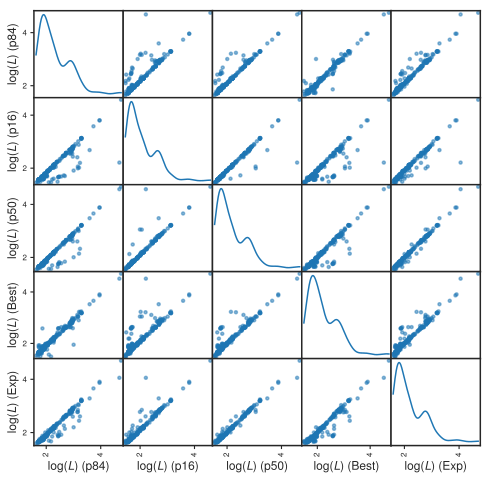

In [3]:
from pandas.tools.plotting import scatter_matrix
from beast.plotting.beastplotlib import fancify_colname

df = t.to_pandas() # convert table to Pandas dataframe

df_logL = df.filter(regex='logL') # select only columns with logL in name

sm = scatter_matrix(df_logL, diagonal='kde', figsize=(8,8))

# use fancify_colname function to convert column name axis labels to Texified format
for ax in sm.ravel():
    xlabel = fancify_colname(ax.get_xlabel())
    ax.set_xlabel(xlabel)
    ylabel = fancify_colname(ax.get_ylabel())
    ax.set_ylabel(ylabel)

We can also go full Rorschach with this and plot different quantities against each other, for example the expectation values of luminosity, temperature, initial mass, and log g.

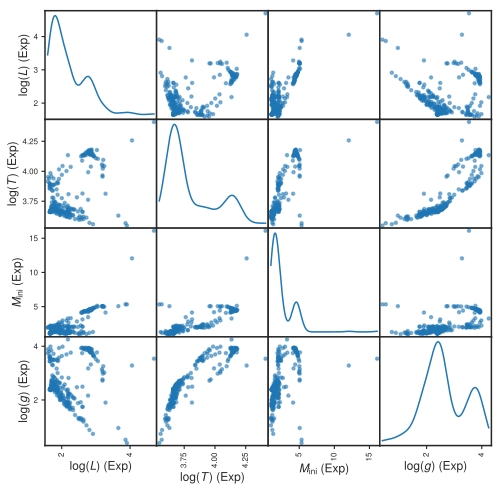

In [4]:
sm = scatter_matrix(df[['logL_Exp','logT_Exp','M_ini_Exp','logg_Exp']], diagonal='kde', figsize=(8,8))
for ax in sm.ravel():
    xlabel = fancify_colname(ax.get_xlabel())
    ax.set_xlabel(xlabel)
    ylabel = fancify_colname(ax.get_ylabel())
    ax.set_ylabel(ylabel)